<a href="https://colab.research.google.com/github/jung0228/ML/blob/main/%EC%A3%BC%EC%8B%9D%EB%8D%B0%EC%9D%B4%ED%84%B0_%EC%9E%AC%EB%AC%B4%EC%9E%AC%ED%91%9C%EC%8D%A8%EB%B3%B4%EA%B8%B0_5%EC%A3%BC%EC%B0%A8.ipynb" target="_parent"><img src="https://colab.research.google.com/assets/colab-badge.svg" alt="Open In Colab"/></a>

In [1]:
import pandas as pd 
import seaborn as sns  
import numpy as np
import sklearn
import sklearn.preprocessing
import tensorflow as tf

In [2]:
#해당 링크는 한국거래소에서 상장법인목록을 엑셀로 다운로드하는 링크입니다.
#다운로드와 동시에 Pandas에 excel 파일이 load가 되는 구조입니다.
stock_code = pd.read_html('http://kind.krx.co.kr/corpgeneral/corpList.do?method=download', header=0)[0] 
#stock_code.head()

# 데이터에서 정렬이 따로 필요하지는 않지만 테스트겸 Pandas sort_values를 이용하여 정렬을 시도해봅니다.
stock_code.sort_values(['상장일'], ascending=True)

# 필요한 것은 "회사명"과 "종목코드" 이므로 필요없는 column들은 제외
stock_code = stock_code[['회사명', '종목코드']] 

# 한글 컬럼명을 영어로 변경 
stock_code = stock_code.rename(columns={'회사명': 'company', '종목코드': 'code'}) 
#stock_code.head() 

# 종목코드가 6자리이기 때문에 6자리를 맞춰주기 위해 설정해줌 
stock_code.code = stock_code.code.map('{:06d}'.format) 

In [3]:
import requests

# LG화학의 일별 시세 url 가져오기 
company='LG화학' 
code = stock_code[stock_code.company==company].code.values[0].strip() ## strip() : 공백제거
page = 1

url = 'http://finance.naver.com/item/sise_day.nhn?code={code}'.format(code=code)     
url = '{url}&page={page}'.format(url=url, page=page)
print(url)
header = {'User-Agent':'Mozilla/5.0 (Macintosh; Intel Mac OS X 10_15_7) AppleWebKit/537.36 '}  

res = requests.get(url,headers=header)
df = pd.read_html(res.text, header=0)[0]
df.head()

http://finance.naver.com/item/sise_day.nhn?code=051910&page=1


,날짜,종가,전일비,시가,고가,저가,거래량
0,NaN,NaN,NaN,NaN,NaN,NaN,NaN
1,2022.02.14,619000.0,14000.0,632000.0,640000.0,618000.0,217784.0
2,2022.02.11,633000.0,28000.0,645000.0,658000.0,633000.0,310519.0
3,2022.02.10,661000.0,51000.0,613000.0,666000.0,613000.0,694375.0
4,2022.02.09,610000.0,7000.0,624000.0,627000.0,610000.0,389461.0


In [4]:
company='LG화학'
code = stock_code[stock_code.company==company].code.values[0].strip() ## strip() : 공백제거
a = 0
df = pd.DataFrame()
for page in range(1,201):
    a += 1
    url = 'http://finance.naver.com/item/sise_day.nhn?code={code}'.format(code=code)     
    url = '{url}&page={page}'.format(url=url, page=page)
    if a%10 == 0:
      print(url)
    header = {'User-Agent':'Mozilla/5.0 (Macintosh; Intel Mac OS X 10_15_7) AppleWebKit/537.36 '}  
    res = requests.get(url,headers=header)
    df = df.append(pd.read_html(res.text, header=0)[0])

http://finance.naver.com/item/sise_day.nhn?code=051910&page=10
http://finance.naver.com/item/sise_day.nhn?code=051910&page=20
http://finance.naver.com/item/sise_day.nhn?code=051910&page=30
http://finance.naver.com/item/sise_day.nhn?code=051910&page=40
http://finance.naver.com/item/sise_day.nhn?code=051910&page=50
http://finance.naver.com/item/sise_day.nhn?code=051910&page=60
http://finance.naver.com/item/sise_day.nhn?code=051910&page=70
http://finance.naver.com/item/sise_day.nhn?code=051910&page=80
http://finance.naver.com/item/sise_day.nhn?code=051910&page=90
http://finance.naver.com/item/sise_day.nhn?code=051910&page=100
http://finance.naver.com/item/sise_day.nhn?code=051910&page=110
http://finance.naver.com/item/sise_day.nhn?code=051910&page=120
http://finance.naver.com/item/sise_day.nhn?code=051910&page=130
http://finance.naver.com/item/sise_day.nhn?code=051910&page=140
http://finance.naver.com/item/sise_day.nhn?code=051910&page=150
http://finance.naver.com/item/sise_day.nhn?code=0

In [5]:
df.to_csv("LG화학.csv")

In [104]:
df_save = df.copy()

이 아래로 반복해서 쓰삼

In [172]:
df = df_save
df

,date,close,diff,open,high,low,volume
13,2013.12.24,294500,3500,292500,296500,291000,154193
12,2013.12.26,296000,1500,296000,297500,295500,150348
11,2013.12.27,295500,500,295500,297500,294000,99817
10,2013.12.30,299500,4000,296000,299500,295500,127495
9,2014.01.02,292000,7500,300500,303000,290500,180305
...,...,...,...,...,...,...,...
5,2022.02.08,617000,22000,630000,655000,617000,691459
4,2022.02.09,610000,7000,624000,627000,610000,389461
3,2022.02.10,661000,51000,613000,666000,613000,694375
2,2022.02.11,633000,28000,645000,658000,633000,310519


In [173]:
df.info()

<class 'pandas.core.frame.DataFrame'>
Int64Index: 2000 entries, 13 to 1
Data columns (total 7 columns):
 #   Column  Non-Null Count  Dtype 
---  ------  --------------  ----- 
 0   date    2000 non-null   object
 1   close   2000 non-null   int64 
 2   diff    2000 non-null   int64 
 3   open    2000 non-null   int64 
 4   high    2000 non-null   int64 
 5   low     2000 non-null   int64 
 6   volume  2000 non-null   int64 
dtypes: int64(6), object(1)
memory usage: 125.0+ KB


In [174]:
# df.dropna()를 이용해 결측값 있는 행 제거 
df = df.dropna() 

# 한글로 된 컬럼명을 영어로 바꿔줌 
df = df.rename(columns= {'날짜': 'date', '종가': 'close', '전일비': 'diff', '시가': 'open', '고가': 'high', '저가': 'low', '거래량': 'volume'}) 
# 데이터의 타입을 int형으로 바꿔줌 
df[['close', 'diff', 'open', 'high', 'low', 'volume']] = df[['close', 'diff', 'open', 'high', 'low', 'volume']].astype(int) 

# 컬럼명 'date'의 타입을 date로 바꿔줌 
df['date'] = pd.to_datetime(df['date']) 

# 일자(date)를 기준으로 오름차순 정렬 
df = df.sort_values(by=['date'], ascending=True) 

# 상위 5개 데이터 확인 
df[:5]

,date,close,diff,open,high,low,volume
13,2013-12-24,294500,3500,292500,296500,291000,154193
12,2013-12-26,296000,1500,296000,297500,295500,150348
11,2013-12-27,295500,500,295500,297500,294000,99817
10,2013-12-30,299500,4000,296000,299500,295500,127495
9,2014-01-02,292000,7500,300500,303000,290500,180305


In [109]:
df.info()

<class 'pandas.core.frame.DataFrame'>
Int64Index: 2000 entries, 13 to 1
Data columns (total 7 columns):
 #   Column  Non-Null Count  Dtype         
---  ------  --------------  -----         
 0   date    2000 non-null   datetime64[ns]
 1   close   2000 non-null   int64         
 2   diff    2000 non-null   int64         
 3   open    2000 non-null   int64         
 4   high    2000 non-null   int64         
 5   low     2000 non-null   int64         
 6   volume  2000 non-null   int64         
dtypes: datetime64[ns](1), int64(6)
memory usage: 125.0 KB


In [110]:
import matplotlib.pyplot as plt
# 필요한 모듈 import 하기 
import plotly
import plotly.graph_objects as go
import plotly.express as px

# %matplotlib inline 은 jupyter notebook 사용자용 - jupyter notebook 내에 그래프가 그려지게 한다.
%matplotlib inline 

In [111]:
df.columns

Index(['date', 'close', 'diff', 'open', 'high', 'low', 'volume'], dtype='object')

In [112]:
corr = df.corr()
print(corr['close'])

close     1.000000
diff      0.502506
open      0.998815
high      0.999505
low       0.999494
volume    0.306018
Name: close, dtype: float64


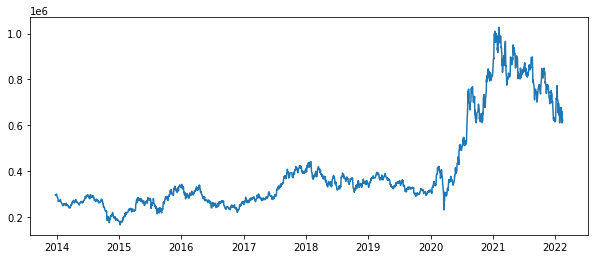

In [113]:
plt.figure(figsize=(10,4))
plt.plot(df['date'], df['close'])

In [114]:
# function for min-max normalization of stock
def normalize_data(df):
    min_max_scaler = sklearn.preprocessing.MinMaxScaler()
    df['open'] = min_max_scaler.fit_transform(df.open.values.reshape(-1,1))
    df['high'] = min_max_scaler.fit_transform(df.high.values.reshape(-1,1))
    df['low'] = min_max_scaler.fit_transform(df.low.values.reshape(-1,1))
    df['close'] = min_max_scaler.fit_transform(df['close'].values.reshape(-1,1))
    return df

# function to create train, validation, test data given stock data and sequence length
def load_data(stock, seq_len):
    data_raw = stock.to_numpy() # convert to numpy array
    data = []
    #print(data_raw)
    # create all possible sequences of length seq_len
    for index in range(len(data_raw) - seq_len): 
        data.append(data_raw[index: index + seq_len])

    valid_set_size_percentage = 10
    test_set_size_percentage = 10

    data = np.array(data);
    valid_set_size = int(np.round(valid_set_size_percentage/100*data.shape[0]));  
    test_set_size = int(np.round(test_set_size_percentage/100*data.shape[0]));
    train_set_size = data.shape[0] - (valid_set_size + test_set_size);
    
    x_train = data[:train_set_size,:-1,:]
    y_train = data[:train_set_size,-1,:]
    
    x_valid = data[train_set_size:train_set_size+valid_set_size,:-1,:]
    y_valid = data[train_set_size:train_set_size+valid_set_size,-1,:]
    
    x_test = data[train_set_size+valid_set_size:,:-1,:]
    y_test = data[train_set_size+valid_set_size:,-1,:]
    
    return [x_train, y_train, x_valid, y_valid, x_test, y_test]

In [115]:
# choose one stock
import warnings
warnings.filterwarnings(action = 'ignore')
df_stock = df.copy()
df_stock.drop(['volume'],1,inplace=True)
df_stock.drop(['diff'],1,inplace=True)
df_stock.drop(['date'],1,inplace=True)


cols = list(df_stock.columns.values)
print('df_stock.columns.values = ', cols)

# normalize stock
df_stock_norm = df_stock.copy()
df_stock_norm = normalize_data(df_stock_norm)

# create train, test data
seq_len = 20 # choose sequence length
x_train, y_train, x_valid, y_valid, x_test, y_test = load_data(df_stock_norm, seq_len)
print('x_train.shape = ',x_train.shape)
print('y_train.shape = ', y_train.shape)
print('x_valid.shape = ',x_valid.shape)
print('y_valid.shape = ', y_valid.shape)
print('x_test.shape = ', x_test.shape)
print('y_test.shape = ',y_test.shape)

df_stock.columns.values =  ['close', 'open', 'high', 'low']
x_train.shape =  (1584, 19, 4)
y_train.shape =  (1584, 4)
x_valid.shape =  (198, 19, 4)
y_valid.shape =  (198, 4)
x_test.shape =  (198, 19, 4)
y_test.shape =  (198, 4)


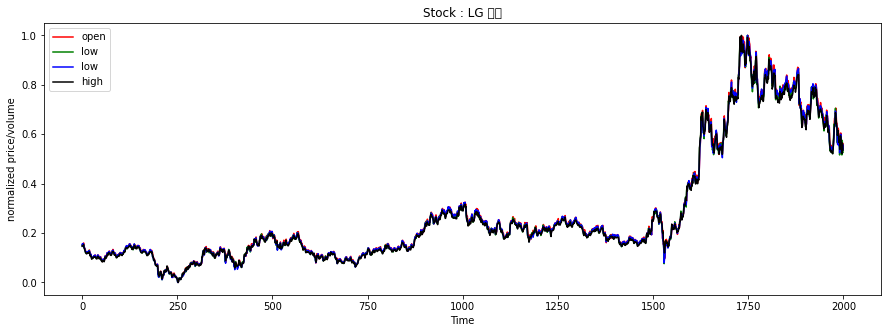

In [116]:
plt.figure(figsize=(15, 5));
plt.plot(df_stock_norm.open.values, color='red', label='open')
plt.plot(df_stock_norm.close.values, color='green', label='low')
plt.plot(df_stock_norm.low.values, color='blue', label='low')
plt.plot(df_stock_norm.high.values, color='black', label='high')
#plt.plot(df_stock_norm.volume.values, color='gray', label='volume')
plt.title('Stock : LG 화학') 
plt.xlabel('Time') 
plt.ylabel('normalized price/volume') 
plt.legend(loc='best') 
plt.show() 

In [117]:
tf.config.run_functions_eagerly(True)

index_in_epoch = 0;
#np.arange(3) => array([0, 1, 2])
perm_array  = np.arange(x_train.shape[0])
#섞어
np.random.shuffle(perm_array)
print(x_train.shape[0])

# function to get the next batch
def get_next_batch(batch_size):
    global index_in_epoch, x_train, perm_array   # 전역 변수를 쓰겠다.
    start = index_in_epoch                  # 배치의 시작은 인덱스 에서 시작
    index_in_epoch += batch_size            # 배치 사이즈 만큼 인덱스 증가
    
    if index_in_epoch > x_train.shape[0]:   # 인덱스가 275 보다 크다면
        np.random.shuffle(perm_array)       # shuffle permutation array
        start = 0                           # start next epoch
        index_in_epoch = batch_size         # 배치는 배치 사이즈 만큼의 크기에서 시작함
        
    end = index_in_epoch                    # 배치의 끝은 인덱스
    return x_train[perm_array[start:end]], y_train[perm_array[start:end]]  # x_train, y_train 리턴해주는 데 start에서 end까지

1584


In [118]:
# parameters
n_steps = seq_len-1 
n_inputs = 4 
n_neurons = 200 
n_outputs = 4 
n_layers = 2 
learning_rate = 0.001 
batch_size = 50 
n_epochs = 100 
train_set_size = x_train.shape[0] 
test_set_size = x_test.shape[0] 

In [119]:
tf.compat.v1.reset_default_graph() 
tf.compat.v1.disable_eager_execution() # 활성 함수 (?) 
# 인풋이 X 
X = tf.compat.v1.placeholder(tf.float32, [None, n_steps, n_inputs]) #자리를 공급...? 무엇에 대한 자리지? 
# 아웃풋이 y 
y = tf.compat.v1.placeholder(tf.float32, [None, n_outputs]) 

# use Basic RNN Cell 
layers = [tf.compat.v1.nn.rnn_cell.BasicRNNCell(num_units=n_neurons, activation=tf.nn.elu) 
          for layer in range(n_layers)]  
# 뉴런 수 : 200개, 활성함수 : tf.nn.elu (ReLu 비슷한 것임) <= 레이어 수만큼 반복 


multi_layer_cell = tf.compat.v1.nn.rnn_cell.MultiRNNCell(layers) #만든 레이어들을 MultiRNNCell
# RNNCell cell 로 지정된 반복 신경 네트워크를 만듭니다 .
rnn_outputs, states = tf.compat.v1.nn.dynamic_rnn(multi_layer_cell, X, dtype=tf.float32)
stacked_rnn_outputs = tf.reshape(rnn_outputs, [-1, n_neurons]) 
stacked_outputs = tf.compat.v1.layers.dense(stacked_rnn_outputs, n_outputs)
outputs = tf.reshape(stacked_outputs, [-1, n_steps, n_outputs])
outputs = outputs[:,n_steps-1,:] # keep only last output of sequence

In [120]:
loss = tf.reduce_mean(tf.square(outputs - y)) # loss function = mean squared error 
optimizer = tf.compat.v1.train.AdamOptimizer(
    learning_rate=0.001, 
    name='Adam'
)
training_op = optimizer.minimize(loss)
# The first step is `-learning_rate*sign(grad)`
# run graph

In [121]:
with tf.compat.v1.Session() as sess: 
    sess.run(tf.compat.v1.global_variables_initializer())
    for iteration in range(int(n_epochs*train_set_size/batch_size)):
        x_batch, y_batch = get_next_batch(batch_size) # fetch the next training batch 
        sess.run(training_op, feed_dict={X: x_batch, y: y_batch}) 
        if iteration % int(5*train_set_size/batch_size) == 0:
            mse_train = loss.eval(feed_dict={X: x_train, y: y_train}) 
            mse_valid = loss.eval(feed_dict={X: x_valid, y: y_valid}) 
            print('%.2f epochs: MSE train/valid = %.6f/%.6f'%(
                iteration*batch_size/train_set_size, mse_train, mse_valid))

    y_train_pred = sess.run(outputs, feed_dict={X: x_train})
    y_valid_pred = sess.run(outputs, feed_dict={X: x_valid})
    y_test_pred = sess.run(outputs, feed_dict={X: x_test})

0.00 epochs: MSE train/valid = 0.127837/0.766653
4.99 epochs: MSE train/valid = 0.000202/0.003640
9.97 epochs: MSE train/valid = 0.000088/0.003606
14.96 epochs: MSE train/valid = 0.000083/0.002088
19.95 epochs: MSE train/valid = 0.000091/0.002361
24.94 epochs: MSE train/valid = 0.000059/0.002566
29.92 epochs: MSE train/valid = 0.000059/0.002422
34.91 epochs: MSE train/valid = 0.000059/0.001130
39.90 epochs: MSE train/valid = 0.000046/0.001553
44.89 epochs: MSE train/valid = 0.000048/0.001303
49.87 epochs: MSE train/valid = 0.000043/0.001792
54.86 epochs: MSE train/valid = 0.000042/0.001237
59.85 epochs: MSE train/valid = 0.000049/0.001178
64.84 epochs: MSE train/valid = 0.000042/0.001555
69.82 epochs: MSE train/valid = 0.000051/0.001704
74.81 epochs: MSE train/valid = 0.000041/0.001061
79.80 epochs: MSE train/valid = 0.000044/0.001495
84.79 epochs: MSE train/valid = 0.000060/0.001836
89.77 epochs: MSE train/valid = 0.000051/0.000917
94.76 epochs: MSE train/valid = 0.000050/0.001887
99.

correct sign prediction for close - open price for train/valid/test: 0.66/0.56/0.49


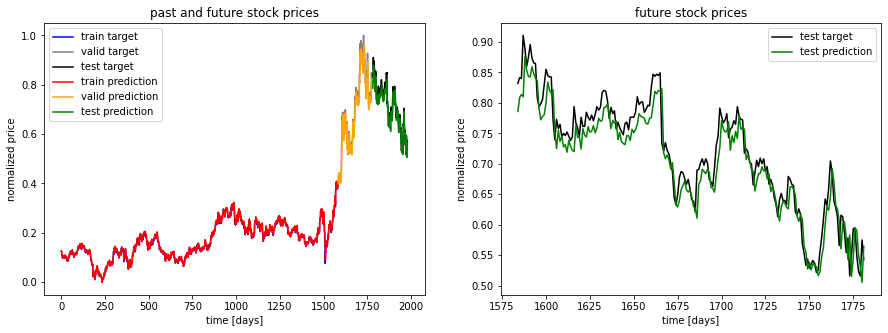

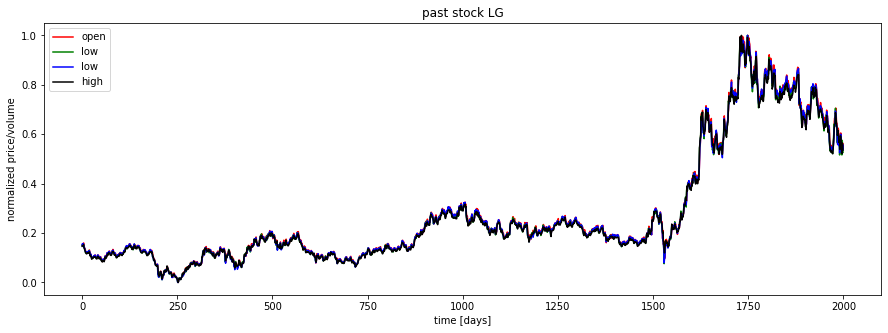

In [122]:
ft = 0 # 0 = open, 1 = close, 2 = highest, 3 = lowest

## show predictions
plt.figure(figsize=(15, 5));
plt.subplot(1,2,1);

plt.plot(np.arange(y_train.shape[0]), y_train[:,ft], color='blue', label='train target')

plt.plot(np.arange(y_train.shape[0], y_train.shape[0]+y_valid.shape[0]), y_valid[:,ft],
         color='gray', label='valid target')

plt.plot(np.arange(y_train.shape[0]+y_valid.shape[0],
                   y_train.shape[0]+y_test.shape[0]+y_test.shape[0]),
         y_test[:,ft], color='black', label='test target')

plt.plot(np.arange(y_train_pred.shape[0]),y_train_pred[:,ft], color='red',
         label='train prediction')

plt.plot(np.arange(y_train_pred.shape[0], y_train_pred.shape[0]+y_valid_pred.shape[0]),
         y_valid_pred[:,ft], color='orange', label='valid prediction')

plt.plot(np.arange(y_train_pred.shape[0]+y_valid_pred.shape[0],
                   y_train_pred.shape[0]+y_valid_pred.shape[0]+y_test_pred.shape[0]),
         y_test_pred[:,ft], color='green', label='test prediction')

plt.title('past and future stock prices')
plt.xlabel('time [days]')
plt.ylabel('normalized price')
plt.legend(loc='best');

plt.subplot(1,2,2);

plt.plot(np.arange(y_train.shape[0], y_train.shape[0]+y_test.shape[0]),
         y_test[:,ft], color='black', label='test target')

plt.plot(np.arange(y_train_pred.shape[0], y_train_pred.shape[0]+y_test_pred.shape[0]),
         y_test_pred[:,ft], color='green', label='test prediction')

plt.title('future stock prices')
plt.xlabel('time [days]')
plt.ylabel('normalized price')
plt.legend(loc='best');

corr_price_development_train = np.sum(np.equal(np.sign(y_train[:,1]-y_train[:,0]),
            np.sign(y_train_pred[:,1]-y_train_pred[:,0])).astype(int)) / y_train.shape[0]
corr_price_development_valid = np.sum(np.equal(np.sign(y_valid[:,1]-y_valid[:,0]),
            np.sign(y_valid_pred[:,1]-y_valid_pred[:,0])).astype(int)) / y_valid.shape[0]
corr_price_development_test = np.sum(np.equal(np.sign(y_test[:,1]-y_test[:,0]),
            np.sign(y_test_pred[:,1]-y_test_pred[:,0])).astype(int)) / y_test.shape[0]

print('correct sign prediction for close - open price for train/valid/test: %.2f/%.2f/%.2f'%(
    corr_price_development_train, corr_price_development_valid, corr_price_development_test))

# 과거의 데이터
plt.figure(figsize=(15, 5));
plt.plot(df_stock_norm.open.values, color='red', label='open')
plt.plot(df_stock_norm.close.values, color='green', label='low')
plt.plot(df_stock_norm.low.values, color='blue', label='low')
plt.plot(df_stock_norm.high.values, color='black', label='high')
#plt.plot(df_stock_norm.volume.values, color='gray', label='volume')
plt.title('past stock LG')
plt.xlabel('time [days]')
plt.ylabel('normalized price/volume')
plt.legend(loc='best')
plt.show()

In [25]:
df = pd.read_excel("/content/LG화학_10년.xlsx")

In [26]:
!pip install openpyxl

In [27]:
from openpyxl import Workbook, load_workbook
import pandas as pd

In [164]:
file = 'LG화학_10년.xlsx'

wb = load_workbook(file)

ws_bs = wb['Data_bs']

y_list = []
c= 9
while ws_bs.cell(2, c).value != None:
  y = ws_bs.cell(1, c).value
  if y[:1] == '2':
    y_list.append(y)
  c += 1

bs_items = ['ifrs-full_CurrentAssets', 'ifrs-full_IssuedCapital', 'ifrs-full_Liabilities', 'ifrs-full_NoncurrentAssets', 
            'ifrs-full_CurrentLiabilities', 'ifrs-full_NoncurrentLiabilities']

df_list = []
for bs_item in bs_items:
  temp_list = []
  r = 4
  while ws_bs.cell(r, 2).value != None:
    if ws_bs.cell(r,2).value == bs_item:
      item = ws_bs.cell(r, 3).value
      c = 9
      while ws_bs.cell(1, c).value != None:
        temp_list.append(ws_bs.cell(r, c).value)
        c += 1
    r += 1
  df = pd.DataFrame({item : temp_list}, index = y_list)
  df_list.append(df)

total_df = pd.concat(df_list, axis=1)
total_df = total_df.transpose()


In [165]:
total_df = total_df.drop('자본금')

In [166]:
total_df

,20201231,20191231,20181231,20171231,20161231,20151231,20141231,20131231,20121231,20111231
유동자산,16319700000000,11869724000000,12088512000000,11205581000000,9226934000000,8655605000000,8146821000000,8031617000000,7452938000000,7256212000000
부채총계,22598454000000,16640637000000,11622009000000,8702644000000,6436093000000,5475206000000,5861794000000,5720802000000,5815798000000,5577875000000
비유동자산,25069194000000,22154702000000,16855625000000,13835640000000,11260126000000,9923123000000,9980825000000,9414847000000,9128215000000,8029342000000
유동부채,12624219000000,8941529000000,7273534000000,6644689000000,5446851000000,4798981000000,4809049000000,4597877000000,4338012000000,4723904000000
비유동부채,9974235000000,7699108000000,4348475000000,2057955000000,989242000000,676225000000,1052745000000,1122925000000,1477786000000,853971000000


In [168]:
a = total_df.columns
df_sub = []
for i in range(len(a)-1):
  df_sub.append(total_df[a[i]] - total_df[a[i+1]])
for i in range(len(a)-1):
  print(a[i])
  print(df_sub[i])

20201231
유동자산     4449976000000
부채총계     5957817000000
비유동자산    2914492000000
유동부채     3682690000000
비유동부채    2275127000000
dtype: int64
20191231
유동자산     -218788000000
부채총계     5018628000000
비유동자산    5299077000000
유동부채     1667995000000
비유동부채    3350633000000
dtype: int64
20181231
유동자산      882931000000
부채총계     2919365000000
비유동자산    3019985000000
유동부채      628845000000
비유동부채    2290520000000
dtype: int64
20171231
유동자산     1978647000000
부채총계     2266551000000
비유동자산    2575514000000
유동부채     1197838000000
비유동부채    1068713000000
dtype: int64
20161231
유동자산      571329000000
부채총계      960887000000
비유동자산    1337003000000
유동부채      647870000000
비유동부채     313017000000
dtype: int64
20151231
유동자산     508784000000
부채총계    -386588000000
비유동자산    -57702000000
유동부채     -10068000000
비유동부채   -376520000000
dtype: int64
20141231
유동자산     115204000000
부채총계     140992000000
비유동자산    565978000000
유동부채     211172000000
비유동부채    -70180000000
dtype: int64
20131231
유동자산     578679000000
부채총계     -9499600000

In [175]:
df['time_epoch'] = (df['date'].astype(np.int64)/100000000000).astype(np.int64)  

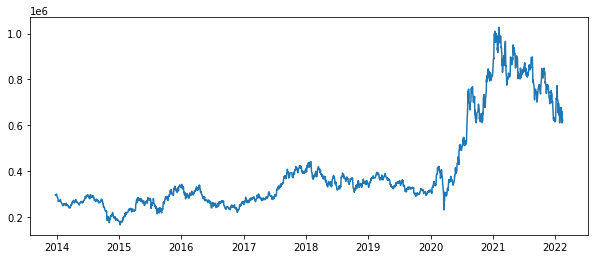

In [176]:
plt.figure(figsize=(10,4))  
plt.plot(df['date'], df['close']) 

In [177]:
#print(df['date'].dt.year)
df1 = df.copy()  # 데이터 전처리용 임시 데이터프레임 생성

year = df['date'].dt.year # 데이터프레임의 date 값에서 year 추출

df1.insert(0,'year',year) # 연도별 분류를위한 year 열 생성 및 yaer 값 입력
df1['time_epoch'] = (df1['date'].astype(np.int64)/100000000000).astype(np.int64)  

df1

,year,date,close,diff,open,high,low,volume,time_epoch
13,2013,2013-12-24,294500,3500,292500,296500,291000,154193,13878432
12,2013,2013-12-26,296000,1500,296000,297500,295500,150348,13880160
11,2013,2013-12-27,295500,500,295500,297500,294000,99817,13881024
10,2013,2013-12-30,299500,4000,296000,299500,295500,127495,13883616
9,2014,2014-01-02,292000,7500,300500,303000,290500,180305,13886208
...,...,...,...,...,...,...,...,...,...
5,2022,2022-02-08,617000,22000,630000,655000,617000,691459,16442784
4,2022,2022-02-09,610000,7000,624000,627000,610000,389461,16443648
3,2022,2022-02-10,661000,51000,613000,666000,613000,694375,16444512
2,2022,2022-02-11,633000,28000,645000,658000,633000,310519,16445376


---전년대비 변화량---
20141231 
 유동자산     115204000000
부채총계     140992000000
비유동자산    565978000000
유동부채     211172000000
비유동부채    -70180000000
dtype: int64


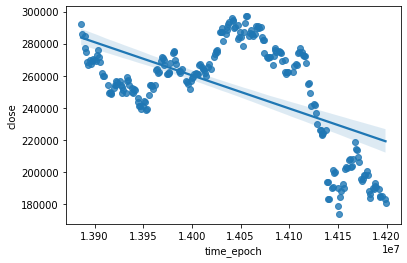

In [188]:
df_2014 = df1[df1['year'] == 2014]
print("---전년대비 변화량---")
print(a[6], '\n',df_sub[6])
sns.regplot(x='time_epoch', y='close', data=df_2014)

---전년대비 변화량---
20151231 
 유동자산     508784000000
부채총계    -386588000000
비유동자산    -57702000000
유동부채     -10068000000
비유동부채   -376520000000
dtype: int64


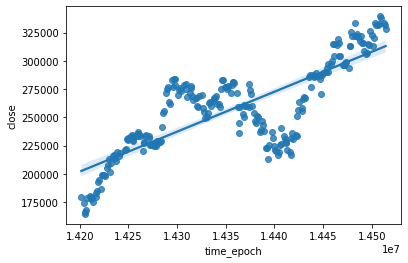

In [189]:
df_2015 = df1[df1['year'] == 2015]
print("---전년대비 변화량---")

print(a[5], '\n',df_sub[5])
sns.regplot(x='time_epoch', y='close', data=df_2015)

---전년대비 변화량---
20161231 
 유동자산      571329000000
부채총계      960887000000
비유동자산    1337003000000
유동부채      647870000000
비유동부채     313017000000
dtype: int64


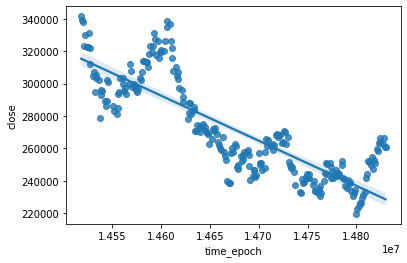

In [190]:
df_2016 = df1[df1['year'] == 2016]
print("---전년대비 변화량---")

print(a[4], '\n',df_sub[4])
sns.regplot(x='time_epoch', y='close', data=df_2016)

---전년대비 변화량---
20171231 
 유동자산     1978647000000
부채총계     2266551000000
비유동자산    2575514000000
유동부채     1197838000000
비유동부채    1068713000000
dtype: int64


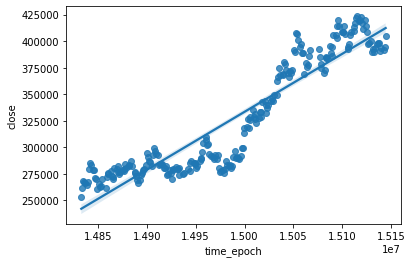

In [191]:
df_2017 = df1[df1['year'] == 2017]
print("---전년대비 변화량---")

print(a[3], '\n',df_sub[3])
sns.regplot(x='time_epoch', y='close', data=df_2017)

---전년대비 변화량---
20181231 
 유동자산      882931000000
부채총계     2919365000000
비유동자산    3019985000000
유동부채      628845000000
비유동부채    2290520000000
dtype: int64


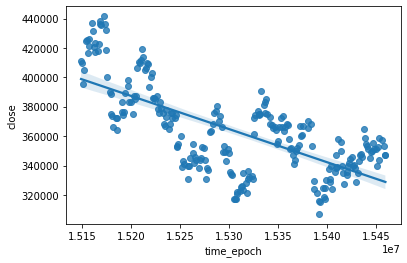

In [192]:
df_2018 = df1[df1['year'] == 2018]
print("---전년대비 변화량---")

print(a[2], '\n',df_sub[2])
sns.regplot(x='time_epoch', y='close', data=df_2018)

---전년대비 변화량---
20191231 
 유동자산     -218788000000
부채총계     5018628000000
비유동자산    5299077000000
유동부채     1667995000000
비유동부채    3350633000000
dtype: int64


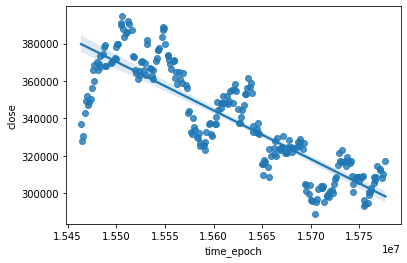

In [193]:
df_2019 = df1[df1['year'] == 2019]
print("---전년대비 변화량---")

print(a[1], '\n',df_sub[1])
sns.regplot(x='time_epoch', y='close', data=df_2019)

---전년대비 변화량---
20201231 
 유동자산     4449976000000
부채총계     5957817000000
비유동자산    2914492000000
유동부채     3682690000000
비유동부채    2275127000000
dtype: int64


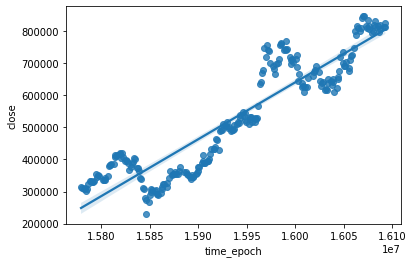

In [194]:
df_2020 = df1[df1['year'] == 2020]
print("---전년대비 변화량---")

print(a[0], '\n',df_sub[0])
sns.regplot(x='time_epoch', y='close', data=df_2020)

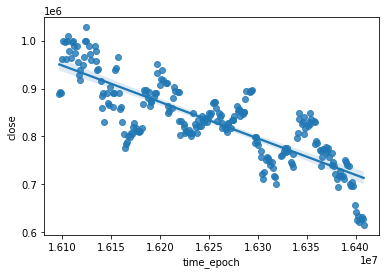

In [186]:
df_2021 = df1[df1['year'] == 2021]
sns.regplot(x='time_epoch', y='close', data=df_2021)